<h1>Защита персональных данных клиентов<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Без-преобразования-признаков" data-toc-modified-id="Без-преобразования-признаков-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Без преобразования признаков</a></span><ul class="toc-item"><li><span><a href="#Признаки-в-исходном-виде" data-toc-modified-id="Признаки-в-исходном-виде-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Признаки в исходном виде</a></span></li><li><span><a href="#Признаки-отмасштабированы" data-toc-modified-id="Признаки-отмасштабированы-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Признаки отмасштабированы</a></span></li></ul></li><li><span><a href="#С-преобразованием-признаков" data-toc-modified-id="С-преобразованием-признаков-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>С преобразованием признаков</a></span><ul class="toc-item"><li><span><a href="#Признаки-в-исходном-виде" data-toc-modified-id="Признаки-в-исходном-виде-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Признаки в исходном виде</a></span></li><li><span><a href="#Признаки-отмасштабированы" data-toc-modified-id="Признаки-отмасштабированы-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Признаки отмасштабированы</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание проекта

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Описание данных

* **Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.
* **Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/datasets/insurance.csv')

In [4]:
df.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [7]:
# преобразование типов данных
df[['Пол','Возраст','Члены семьи', 'Страховые выплаты']] = \
df[['Пол','Возраст','Члены семьи', 'Страховые выплаты']].astype('int8')

In [8]:
# проверка на дубликаты
df.duplicated().sum()

153

In [9]:
df = df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                4847 non-null   int8   
 1   Возраст            4847 non-null   int8   
 2   Зарплата           4847 non-null   float64
 3   Члены семьи        4847 non-null   int8   
 4   Страховые выплаты  4847 non-null   int8   
dtypes: float64(1), int8(4)
memory usage: 94.7 KB


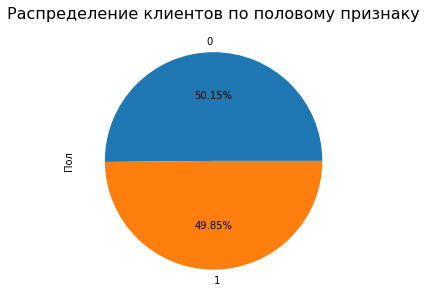

In [11]:
df['Пол'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%.2f%%')
plt.title('Распределение клиентов по половому признаку', fontsize=16);

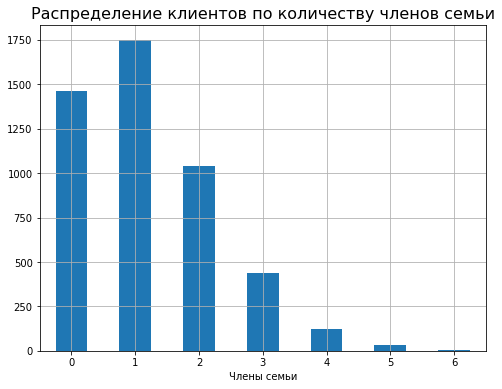

In [12]:
df.groupby('Члены семьи')['Члены семьи'].count().plot(kind='bar', grid=True, rot=0, figsize=(8,6))
plt.title('Распределение клиентов по количеству членов семьи', fontsize=16);

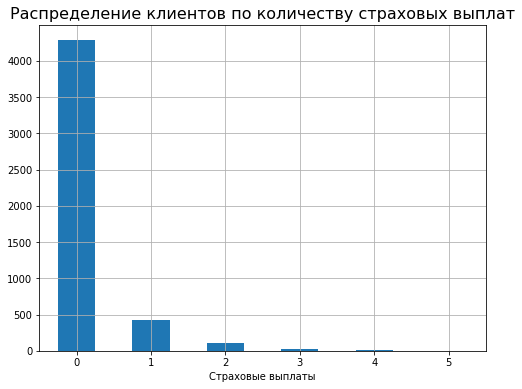

In [13]:
df.groupby('Страховые выплаты')['Страховые выплаты'].count().plot(kind='bar', grid=True, rot=0, figsize=(8,6))
plt.title('Распределение клиентов по количеству страховых выплат', fontsize=16);

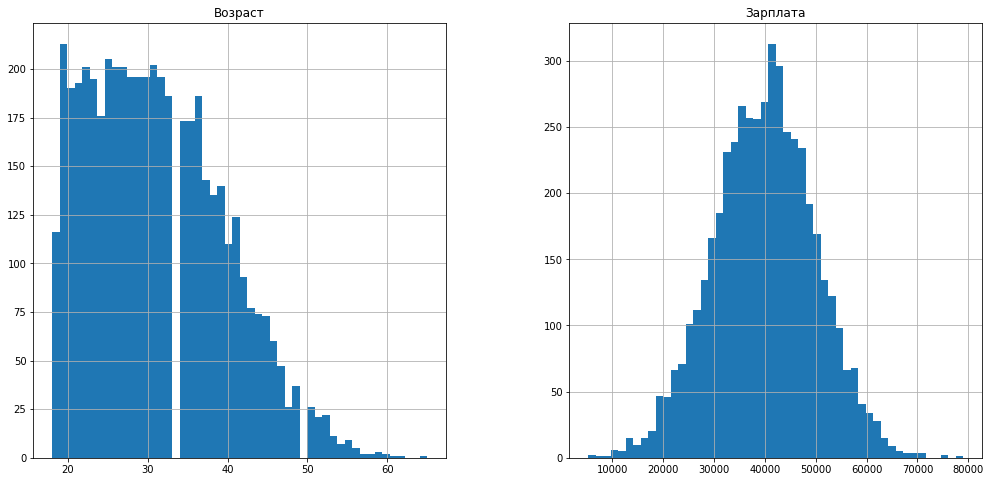

In [14]:
df[['Возраст','Зарплата']].hist(bins=50, figsize=(17,8));

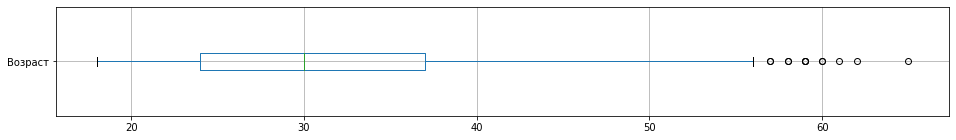

In [15]:
df['Возраст'].plot(kind='box',vert=False, grid=True, figsize=(16,2));

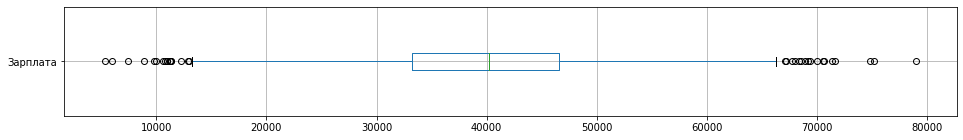

In [16]:
df['Зарплата'].plot(kind='box',vert=False, grid=True, figsize=(16,2));

In [17]:
df.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.001953,0.015456,-0.007315,0.011565
Возраст,0.001953,1.000000,-0.017386,-0.009064,0.654964
Зарплата,0.015456,-0.017386,1.000000,-0.031687,-0.013123
Члены семьи,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
Страховые выплаты,0.011565,0.654964,-0.013123,-0.039303,1.000000


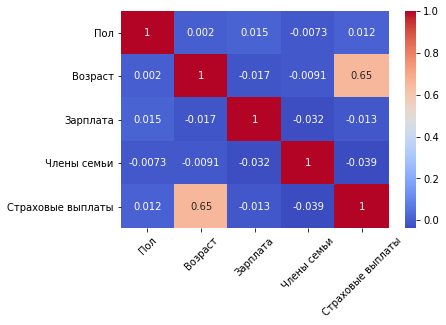

In [18]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.xticks(rotation=45);

In [19]:
df.phik_matrix()

interval columns not set, guessing: ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.000000,0.000000,0.0,0.035338
Возраст,0.000000,1.000000,0.065398,0.0,0.884910
Зарплата,0.000000,0.065398,1.000000,0.0,0.000000
Члены семьи,0.000000,0.000000,0.000000,1.0,0.000000
Страховые выплаты,0.035338,0.884910,0.000000,0.0,1.000000


interval columns not set, guessing: ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']


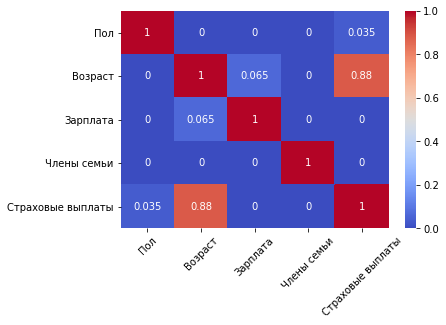

In [20]:
sns.heatmap(df.phik_matrix(), cmap='coolwarm', annot=True)
plt.xticks(rotation=45);

In [21]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

In [22]:
print(features.shape)
target.shape

(4847, 4)


(4847,)

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

**Вывод по разделу:**

* Данные загружены, изменены типы данных для экономии памяти, удалены дубликаты.
* Проверены распределения данных. В некоторых столбцах есть небольшие выбросы.
* Проверена корреляция признаков. Наибольшая взаимосвязь у количества страховых выплат с возрастом и полом клиентов.
* Созданы признаки и целевой признак.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** не изменится.

**Обоснование:** 

Для краткости записи обозначим умножение матрицы $X$ признаков на обратимую матрицу $P$ буквой $Z$:

$$
Z = XP
$$

Предсказания:

$$
a_1 = Zw_1
$$

Формула обучения:

$$
w_1 = (Z^T Z)^{-1} Z^T y
$$

Подставляем $w_1$:

$$
a_1 = Z(Z^T Z)^{-1} Z^T y
$$

Раскрываем уравнение:
$$
a_1 = (XP)((XP)^T (XP))^{-1} (XP)^T y
$$

Свойство транспонирования матриц:
$$
(AB)^T = B^T A^T
$$
Свойство невырожденных квадратных матриц:
$$
(AB)^{-1} = B^{-1} A^{-1}
$$

Докажем равенство $a = a_1$:

$$
X(X^T X)^{-1} X^T y = XP((XP)^T (XP))^{-1} (XP)^T y
$$

$$
X(X^T X)^{-1} X^T y = XP(XP)^{-1} ((XP)^T)^{-1} (XP)^T y
$$

$$
X(X^T X)^{-1} X^T y = XPP^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

$PP^{-1} = E$ и $P^T (P^T)^{-1} = E$. Умножение на единичную матрицу ничего не меняет. Сокращаем лишнее:

$$
X(X^T X)^{-1} X^T y = XE (X^T X)^{-1} EX^T y
$$

$$
X(X^T X)^{-1} X^T y = X(X^T X)^{-1} X^T y
$$

**Вывод:**
Как видим, $a$ осталось неизменным.

**Вопрос:** как связаны параметры линейной регрессии в исходной задаче и в преобразованной?

**Ответ:**

$$
w = (X^T X)^{-1} X^T y
$$  
    
$$
w_1 = ((XP)^T XP)^{-1} (XP)^T y
$$ 

$$
w_1 = ((XP)^T XP)^{-1} (XP)^T y = (XP)^{-1} ((XP)^T)^{-1} P^T X^T y = (XP)^{-1} (P^T X^T)^{-1} P^T X^T y = 
$$

$$
= P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} EX^T y = P^{-1} (X^T X)^{-1} X^T y
$$

$$
\frac{w_1}{w} = \frac{P^{-1} (X^T X)^{-1} X^T y} {(X^T X)^{-1} X^T y} = P^{-1}
$$

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Проверим коэффициенты, получаемые в линейной регрессии и по формуле.

In [23]:
model = LinearRegression()
model.fit(features, target)
model.coef_

array([ 9.46018141e-03,  3.61640081e-02, -1.38991363e-07, -1.42517371e-02])

In [24]:
X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
y = target
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
w[1:]

array([ 9.46018141e-03,  3.61640081e-02, -1.38991363e-07, -1.42517371e-02])

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

**Вывод по разделу:**
    
Приведено доказательство того, что умножение признаков на обратимую матрицу не влияет на обучение. Коэффициенты, получаемые в линейной регрессии и по формуле, совпадают.

## Алгоритм преобразования

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Я правильно понял, что тут надо расписать алгоритм из прошлого пункта?

**Алгоритм**

1. Составляем случайную матрицу $P$ размером $n\times n$, где $n$ - количество признаков.
2. Проверяем обратима ли матрица $P$ . Для этого её детерминант должен быть не равен 0. Если детерминант равен 0, то составляем новую матрицу до тех пор, пока получим нужную.
3. Преобразуем признаки умножением на обратимую матрицу, получаем $Z = XP$.
4. Применяем алгоритм на преобразованных признаках.

**Обоснование**

Применение данного алгоритма имеет смысл, т.к. он не влияет на модель (см. доказательство в п. 4). 

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

**Вывод по разделу:**
    
Описан алгоритм преобразования.

## Проверка алгоритма

In [25]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=42)

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Проверим модель на 4 вариантах данных:
1. Без преобразования признаков:
    1.1. В исходном виде;
    1.2. Отмасштабированныхl
2. С преобразованными признаками:
    2.1. В исходном виде;
    2.2. Отмасштабированными. 

### Без преобразования признаков

#### Признаки в исходном виде

In [26]:
model = LinearRegression()
model.fit(features_train, target_train)
print('Коэффициенты w:', model.coef_)
print(f'R2 = {r2_score(target_valid, model.predict(features_valid)):.5f}')

Коэффициенты w: [-2.21584488e-04  3.55031492e-02  2.91658179e-07 -1.57513454e-02]
R2 = 0.44346


#### Признаки отмасштабированы

In [27]:
scaler = StandardScaler()
scaler.fit(features_train)
col = features_train.columns

features_train_scaler = pd.DataFrame(scaler.transform(features_train), columns=col)
features_valid_scaler = pd.DataFrame(scaler.transform(features_valid), columns=col)

model = LinearRegression()
model.fit(features_train_scaler, target_train)
print('Коэффициенты w:', model.coef_)
print(f'R2 = {r2_score(target_valid, model.predict(features_valid_scaler)):.5f}')

Коэффициенты w: [-1.10792206e-04  2.99943692e-01  2.94043920e-03 -1.74839609e-02]
R2 = 0.44346


### С преобразованием признаков

In [28]:
# функция преобразования признаков
def conversion_features(features):
    n = features.shape[1]
    matrix = np.random.randint(1, 100, (n, n))
    det = np.linalg.det(matrix)
    while det == 0:
        matrix = np.random.randint(1, 100, (n, n))
        det = np.linalg.det(matrix)
    conv_features = features @ matrix
    return conv_features, matrix

In [29]:
new_features, matrix = conversion_features(features)

In [30]:
new_features.columns = features.columns

In [31]:
display(features.head())
display(new_features.head())
matrix

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0


,Пол,Возраст,Зарплата,Члены семьи
0,2728682.0,3820102.0,2482354.0,1044885.0
1,2090673.0,2926922.0,1902577.0,801628.0
2,1155377.0,1617580.0,1051595.0,443233.0
3,2293923.0,3211324.0,2086249.0,877489.0
4,1435938.0,2010340.0,1306592.0,550298.0


array([[74, 80, 52, 42],
       [13, 20, 55, 77],
       [55, 77, 50, 21],
       [75,  2, 47, 86]])

In [32]:
new_features_train, new_features_valid, new_target_train, new_target_valid = train_test_split(
    new_features, target, test_size=0.25, random_state=42)

#### Признаки в исходном виде

In [33]:
model = LinearRegression()
model.fit(new_features_train, new_target_train)
print('Коэффициенты w:', model.coef_)
print(f'R2 = {r2_score(new_target_valid, model.predict(new_features_valid)):.5f}')

Коэффициенты w: [-0.00079146  0.00057451 -0.00028748  0.00065082]
R2 = 0.44346


#### Признаки отмасштабированы

In [34]:
scaler = StandardScaler()
scaler.fit(new_features_train)
col = new_features_train.columns

new_features_train_scaler = pd.DataFrame(scaler.transform(new_features_train), columns=col)
new_features_valid_scaler = pd.DataFrame(scaler.transform(new_features_valid), columns=col)

model = LinearRegression()
model.fit(new_features_train_scaler, new_target_train)
print('Коэффициенты w:', model.coef_)
print(f'R2 = {r2_score(new_target_valid, model.predict(new_features_valid_scaler)):.5f}')

Коэффициенты w: [-438.86184739  445.99265346 -144.91590524  137.7869815 ]
R2 = 0.44346


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
    
**Вывод по разделу:**

* Созданы обучающие и валидационные выборки.
* Проверены 4 варианта модели с разными признаками. У всех получился одинаковый показатель $R^2 = 0,44346$. Коэффициенты $w$ у всех моделей отличаются.

## Общий вывод

* Данные загружены, изменены типы данных для экономии памяти, удалены дубликаты.
* Проверены распределения данных. В некоторых столбцах есть небольшие выбросы.
* Проверена корреляция признаков. Наибольшая взаимосвязь у количества страховых выплат с возрастом и полом клиентов.
* Созданы признаки и целевой признак, из которых получены обучающие и валидационные выборки.
* Приведено доказательство того, что умножение признаков на обратимую матрицу не влияет на обучение. Коэффициенты, получаемые в линейной регрессии и по формуле, совпадают.
* Описан алгоритм преобразования.
* Проверены 4 варианта модели с разными признаками (без преобразования / с преобразованием, в исходном виде / отмасштабированные). У всех получился одинаковый показатель $R^2 = 0,44346$. Коэффициенты $w$ у всех моделей отличаются.